# Add in state-level population data

In [1]:
import pandas as pd
import numpy as np

In [10]:
state_pop = pd.read_excel("../30_intermediate_files/NST-EST2022-POP.xlsx", header = 1)
state_pop['state_new'] = state_pop['State'].apply(lambda x: x.split('.')[1])
state_pop.loc[state_pop['State'] == 'Washington, D.C.', 'state_new'] = 'Washington, D.C.'
state_pop_subset = state_pop.loc[:,['state_new', 2020]]

In [15]:
matched_data = pd.read_csv("../30_intermediate_files/matched_data.csv")
matched_data['inst_state'].unique()

array(['California', 'Washington, D.C.', 'Massachusetts', 'Connecticut',
       'Georgia', 'Texas', 'Ohio', 'Kentucky', 'Idaho', 'Utah', 'Vermont',
       'Tennessee', 'Colorado', 'Oregon', 'New York', 'New Hampshire',
       'Mississippi', 'Pennsylvania', 'Virginia', 'Kansas', 'New Jersey',
       'Indiana', 'Michigan', 'Maryland', 'Minnesota', 'Nebraska',
       'Nevada', 'Rhode Island', 'Illinois', 'Florida', 'Oklahoma',
       'North Carolina', 'Wisconsin', 'Washington'], dtype=object)

In [27]:
first_draft_data = pd.read_csv('../30_intermediate_files/first_draft_data.csv')
cases = pd.read_csv('../10_data/cases_by_month_year.csv')

In [16]:
full_data = matched_data.merge(
    state_pop_subset,
    how = 'left',
    left_on = "inst_state",
    right_on = "state_new"
)

In [28]:
first_draft_w_cases = first_draft_data.merge(
    cases, 
    how = "left", 
    left_on = ["week", "state_abb"],
    right_on = ["week-year", "state"]
)

In [29]:
first_draft_full = first_draft_w_cases.merge(
    state_pop_subset,
    how = 'left',
    left_on = "inst_state",
    right_on = "state_new"
)

In [31]:
first_draft_full[2020].isna().sum()

0

In [11]:
state_pop_subset

,state_new,2020
0,Alabama,5031362
1,Alaska,732923
2,Arizona,7179943
3,Arkansas,3014195
4,California,39501653
5,Colorado,5784865
6,Connecticut,3597362
7,Delaware,992114
8,"Washington, D.C.",670868
9,Florida,21589602


In [22]:
full_data['cases_per_10k'] = 10000 * full_data['new_case'] / full_data[2020]
full_data['cases_per_10k']

0         9.378595
1         6.465552
2         6.465552
3         6.465552
4         6.465552
           ...    
40049    25.091821
40050    10.477690
40051    23.724659
40052    17.330329
40053    10.477690
Name: cases_per_10k, Length: 40054, dtype: float64

In [32]:
first_draft_full['cases_per_10k'] = 10000 * first_draft_full['new_case'] / first_draft_full[2020]

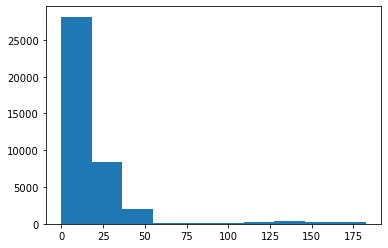

In [35]:
import matplotlib.pyplot as plt
plt.hist(full_data['cases_per_10k'])
plt.show()

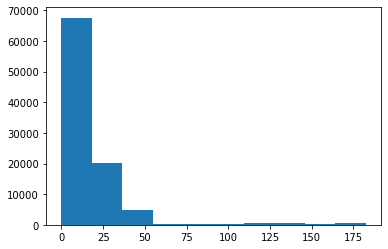

In [34]:
plt.hist( ['cases_per_10k'])
plt.show()

In [24]:
full_data.to_csv("../30_intermediate_files/matched_data_new.csv")

In [36]:
first_draft_full.to_csv("../30_intermediate_files/complete_data.csv")